In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [199]:
import warnings
warnings.simplefilter("ignore")


In [200]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [201]:
df.drop(columns=['Unnamed: 0', 'Booking_ID'],inplace=True)


In [202]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [203]:
df.shape

(29020, 18)

In [204]:
df.drop_duplicates(inplace=True)

In [205]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29012,3,0,0,1,Meal Plan 1,0,Room_Type 4,65,2018,6,21,Online,0,0,0,132.30,0,Canceled
29013,2,0,2,3,Meal Plan 1,0,Room_Type 1,86,2018,6,17,Online,0,0,0,126.90,1,Not_Canceled
29014,2,0,0,2,Meal Plan 1,0,Room_Type 4,0,2018,10,12,Online,0,0,0,139.50,1,Not_Canceled
29015,2,0,2,2,Meal Plan 1,0,Room_Type 1,43,2017,12,26,Offline,0,0,0,55.00,2,Not_Canceled


In [206]:
cat_cols = [
    "type_of_meal_plan",
    "required_car_parking_space",
    "room_type_reserved",
    "market_segment_type",
    "repeated_guest",
    "booking_status"
]

num_cols = [
    "no_of_adults",
    "no_of_children",
    "no_of_weekend_nights",
    "no_of_week_nights",
    "lead_time",
    "arrival_year",
    "arrival_month",
    "arrival_date",
    "no_of_previous_cancellations",
    "no_of_previous_bookings_not_canceled",
    "avg_price_per_room",
    "no_of_special_requests"
]



In [207]:
data = df.copy()

In [208]:
def num_plot_dist(df,num_features):
    fix,axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes = [axes]
    
    for i,column in enumerate (num_features):

        sns.histplot(data=df,x=column,ax=axes[i][0],kde=True,palette="Greens")
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df , x=column,ax=axes[i][1],palette="Greens")
        axes[i][0].set_title(f"Box plot for {column}")

    plt.tight_layout()
    plt.show()

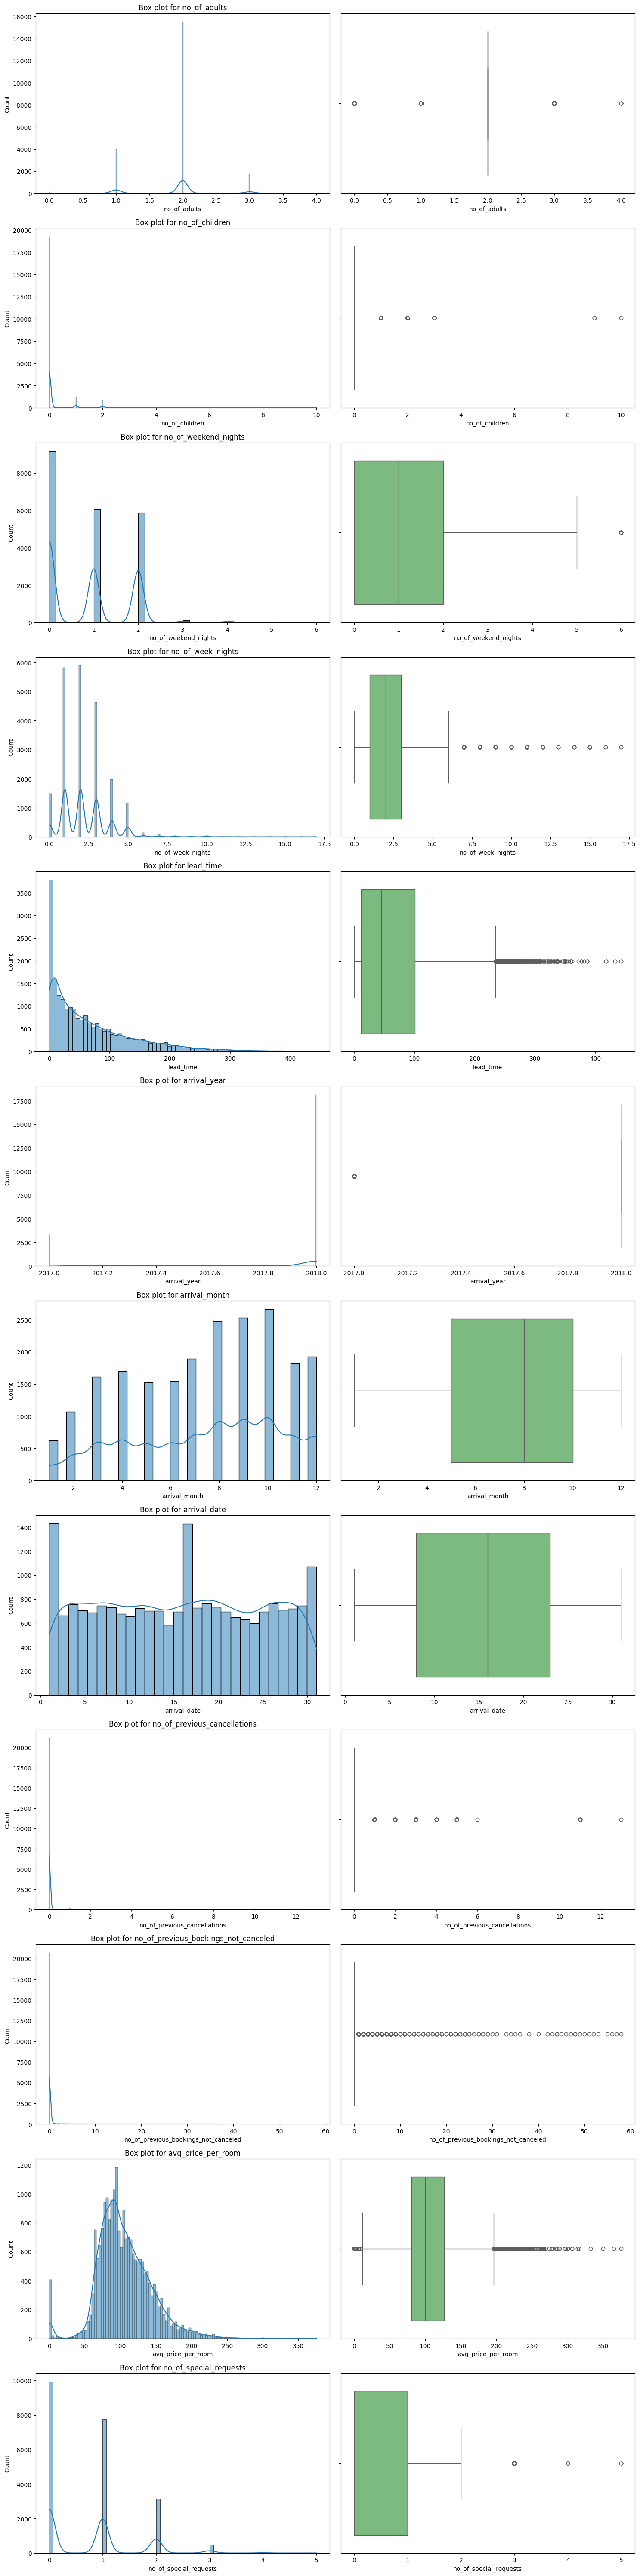

In [209]:
num_plot_dist(data,num_cols)

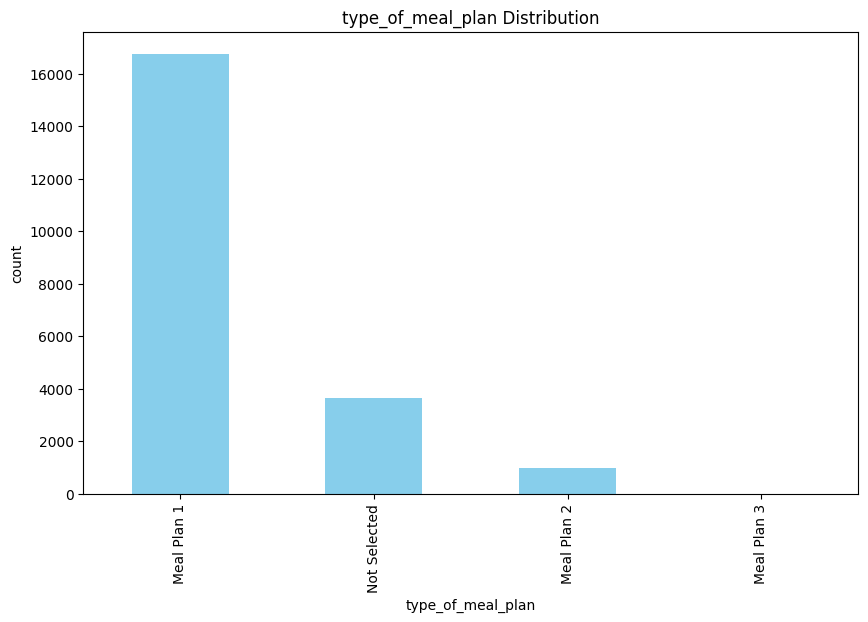

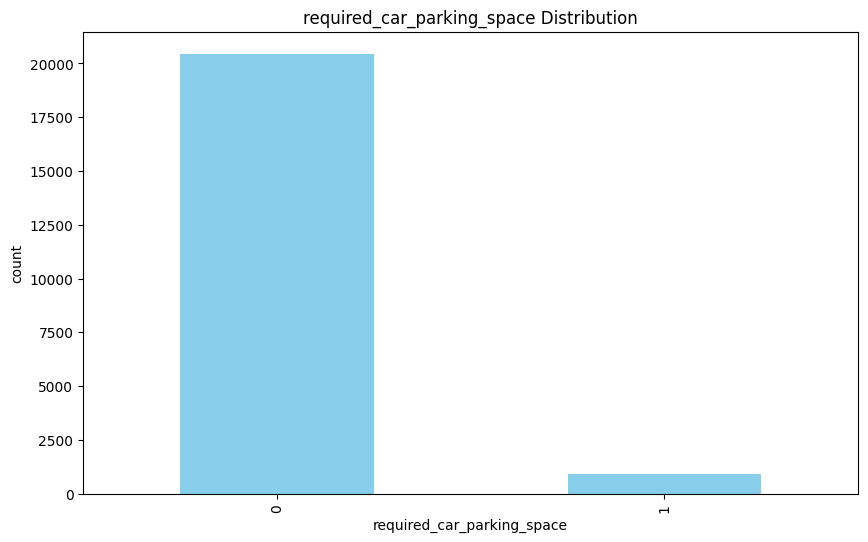

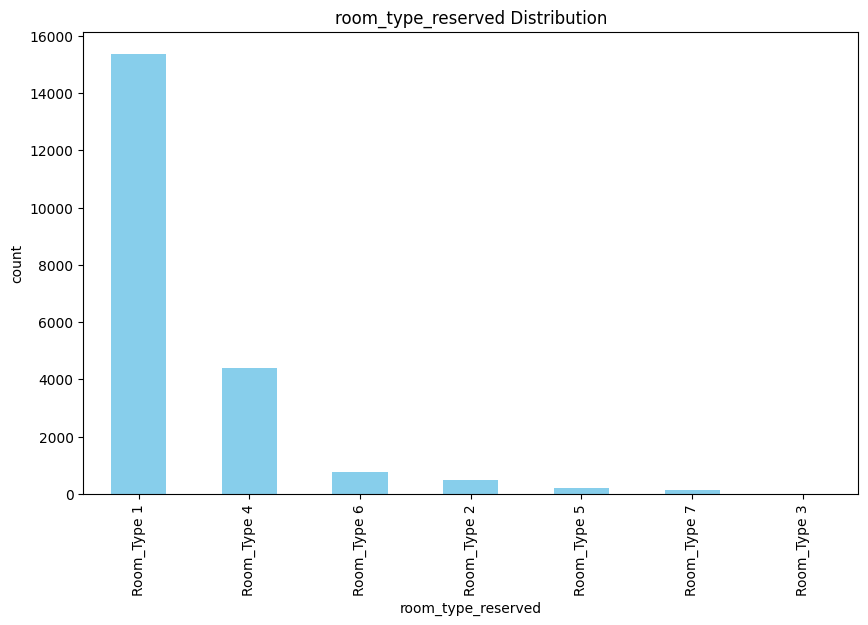

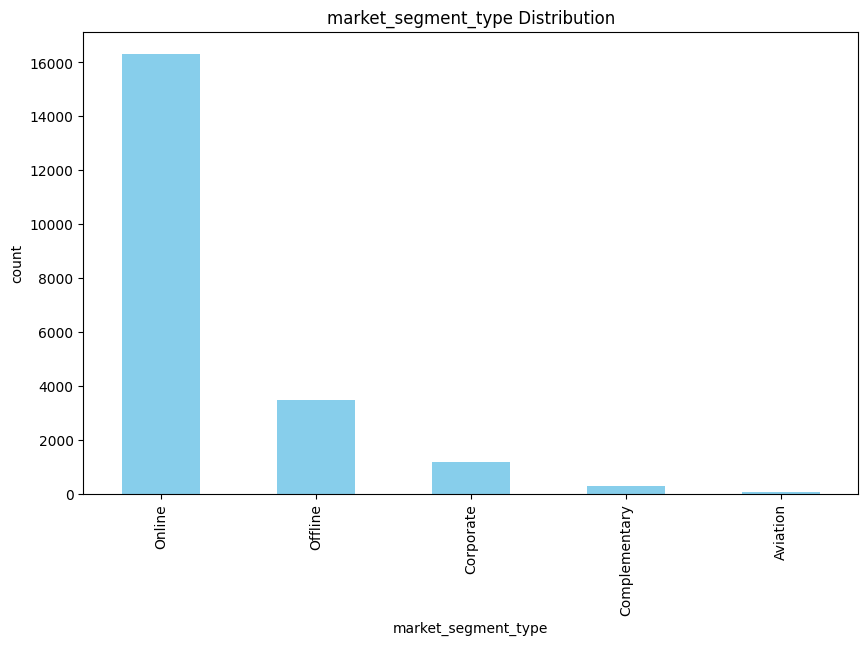

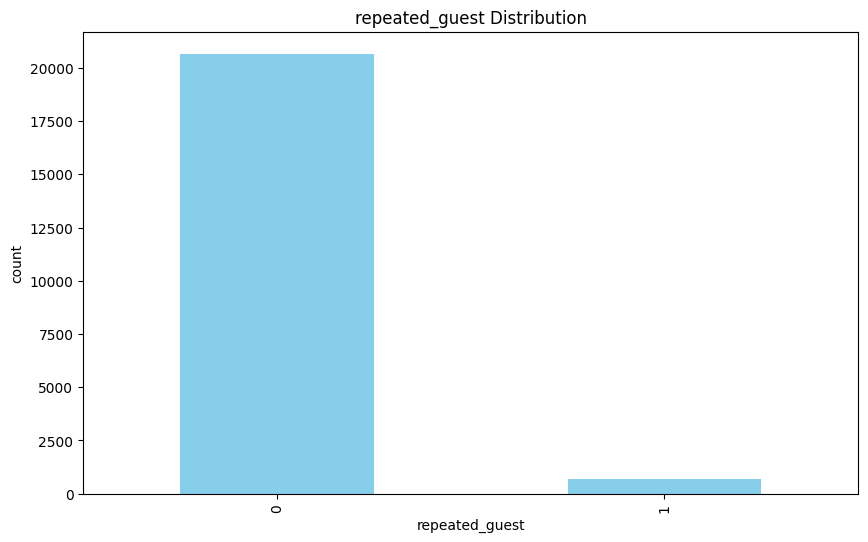

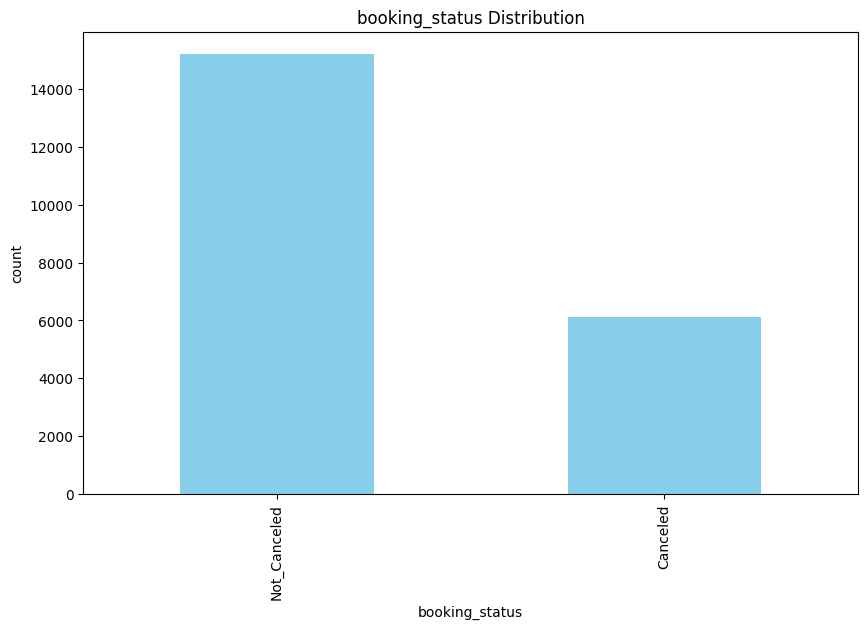

In [210]:
for cat_features in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_features].value_counts().plot(kind='bar',color="skyblue")
    plt.title(f"{cat_features} Distribution")
    plt.xlabel(cat_features)
    plt.ylabel("count")
    plt.show() 

In [211]:
def plot_bivariate_num(df,target,num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig,axes = plt.subplots(num_rows,2,figsize=(15,num_rows*5))
    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i],data=df,palette="Blues")
        axes[i].set_title(f"{column} VS {target}")

    plt.tight_layout()
    plt.show()

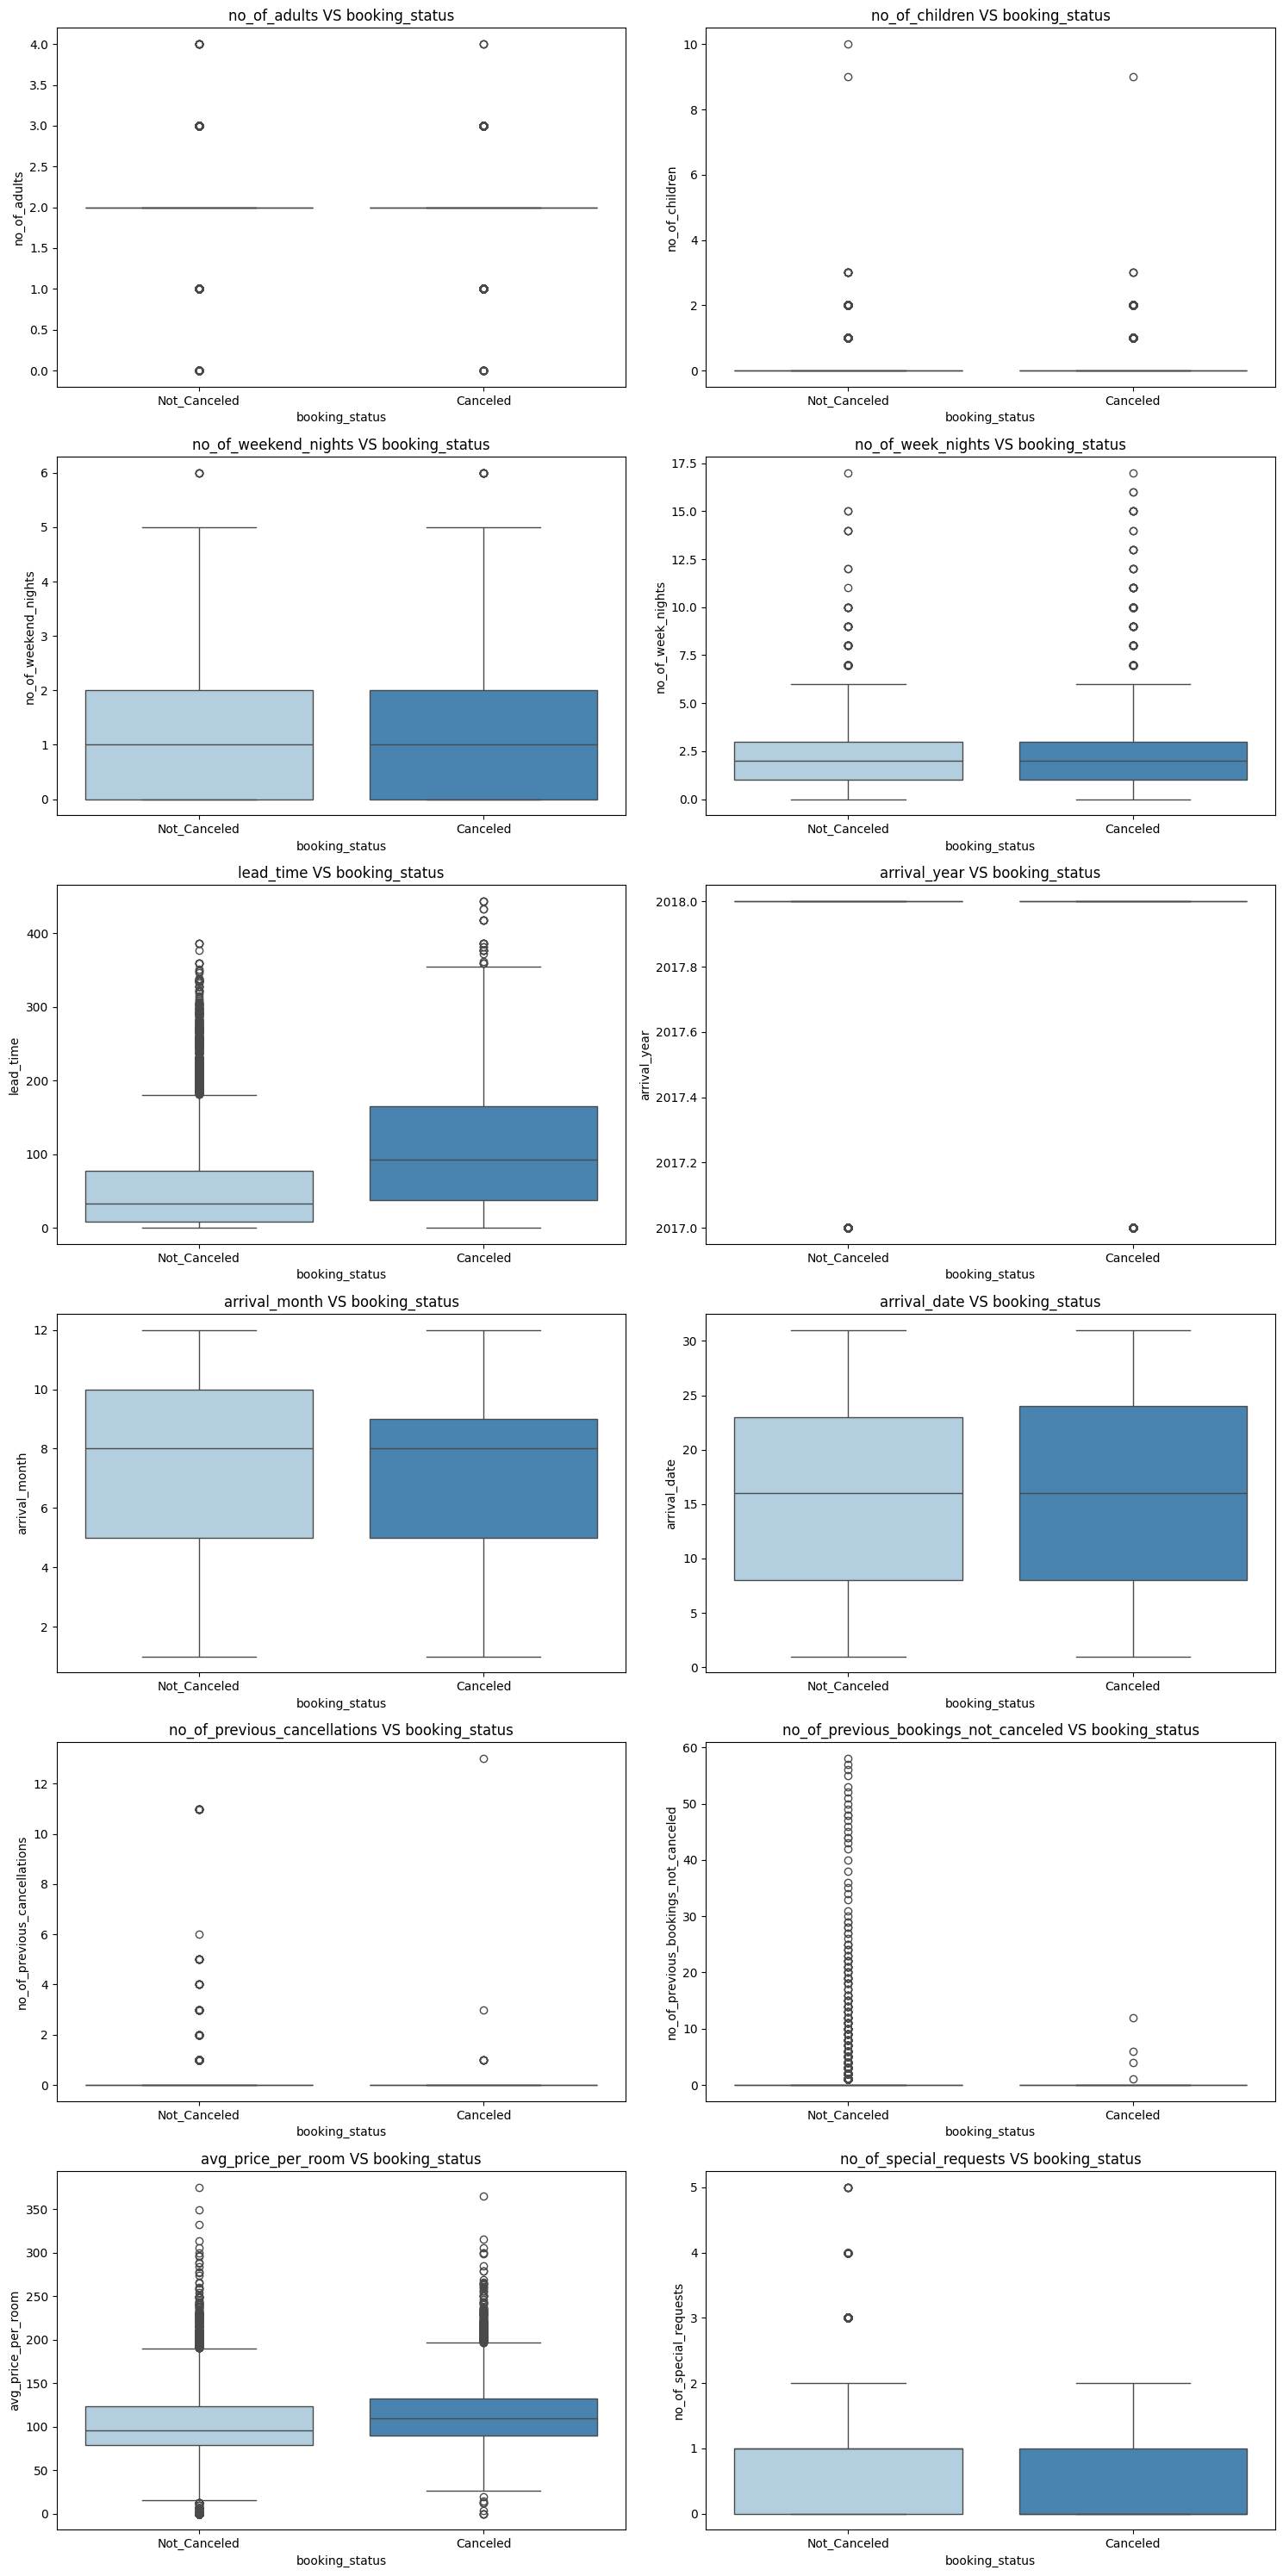

In [212]:
plot_bivariate_num(data,"booking_status",num_cols)

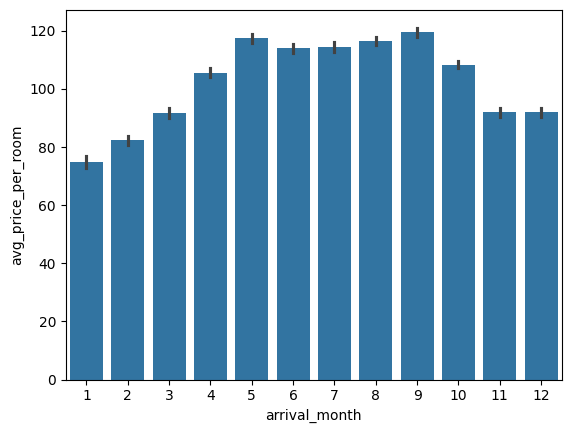

In [213]:
sns.barplot(x="arrival_month",y="avg_price_per_room",data=data)
plt.show()

In [214]:
def plot_bivariate_cat(df,target,cat_features):
    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig,axes = plt.subplots(num_rows,2,figsize=(15,num_rows*5))
    axes = axes.flatten()

    for i,feature in enumerate(cat_features):
        sns.countplot(x=feature,hue=target,data=df,palette = "Set2",ax= axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x',rotation = 90)

    plt.tight_layout()
    plt.show()

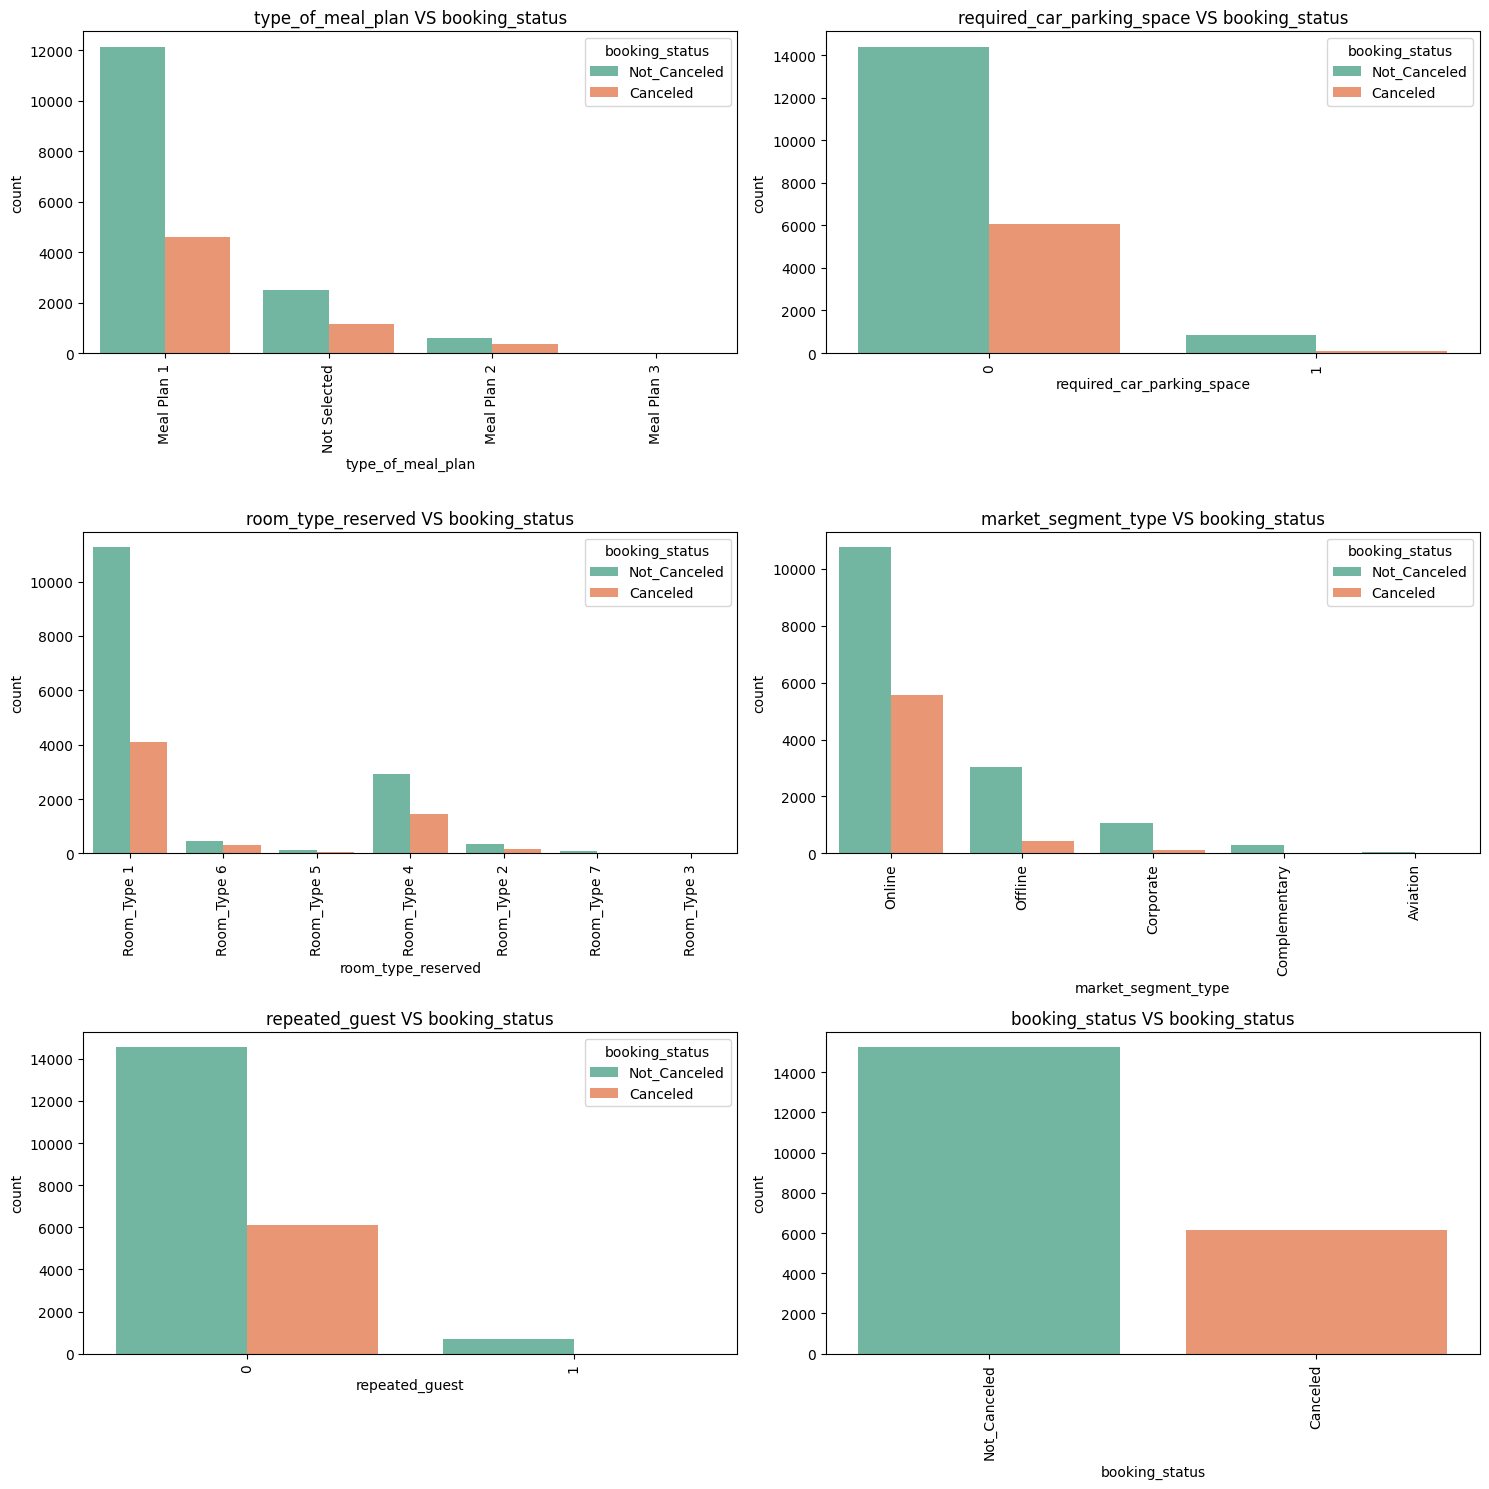

In [215]:
plot_bivariate_cat(data,'booking_status',cat_cols)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [217]:
from sklearn.preprocessing import LabelEncoder

In [218]:
label_encoder = LabelEncoder()
mappings = {}

for column in cat_cols:
    df[column] = label_encoder.fit_transform(df[column])
    mappings[column] = {label:code for label,code in zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_))}



In [219]:
for label,code in mappings.items():
    print(label," -> ",code)

type_of_meal_plan  ->  {'Meal Plan 1': np.int64(0), 'Meal Plan 2': np.int64(1), 'Meal Plan 3': np.int64(2), 'Not Selected': np.int64(3)}
required_car_parking_space  ->  {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
room_type_reserved  ->  {'Room_Type 1': np.int64(0), 'Room_Type 2': np.int64(1), 'Room_Type 3': np.int64(2), 'Room_Type 4': np.int64(3), 'Room_Type 5': np.int64(4), 'Room_Type 6': np.int64(5), 'Room_Type 7': np.int64(6)}
market_segment_type  ->  {'Aviation': np.int64(0), 'Complementary': np.int64(1), 'Corporate': np.int64(2), 'Offline': np.int64(3), 'Online': np.int64(4)}
repeated_guest  ->  {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
booking_status  ->  {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [221]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [222]:
X = add_constant(df)
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]

In [223]:
vif_data

,features,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


In [224]:
corr = df.corr()

<Axes: >

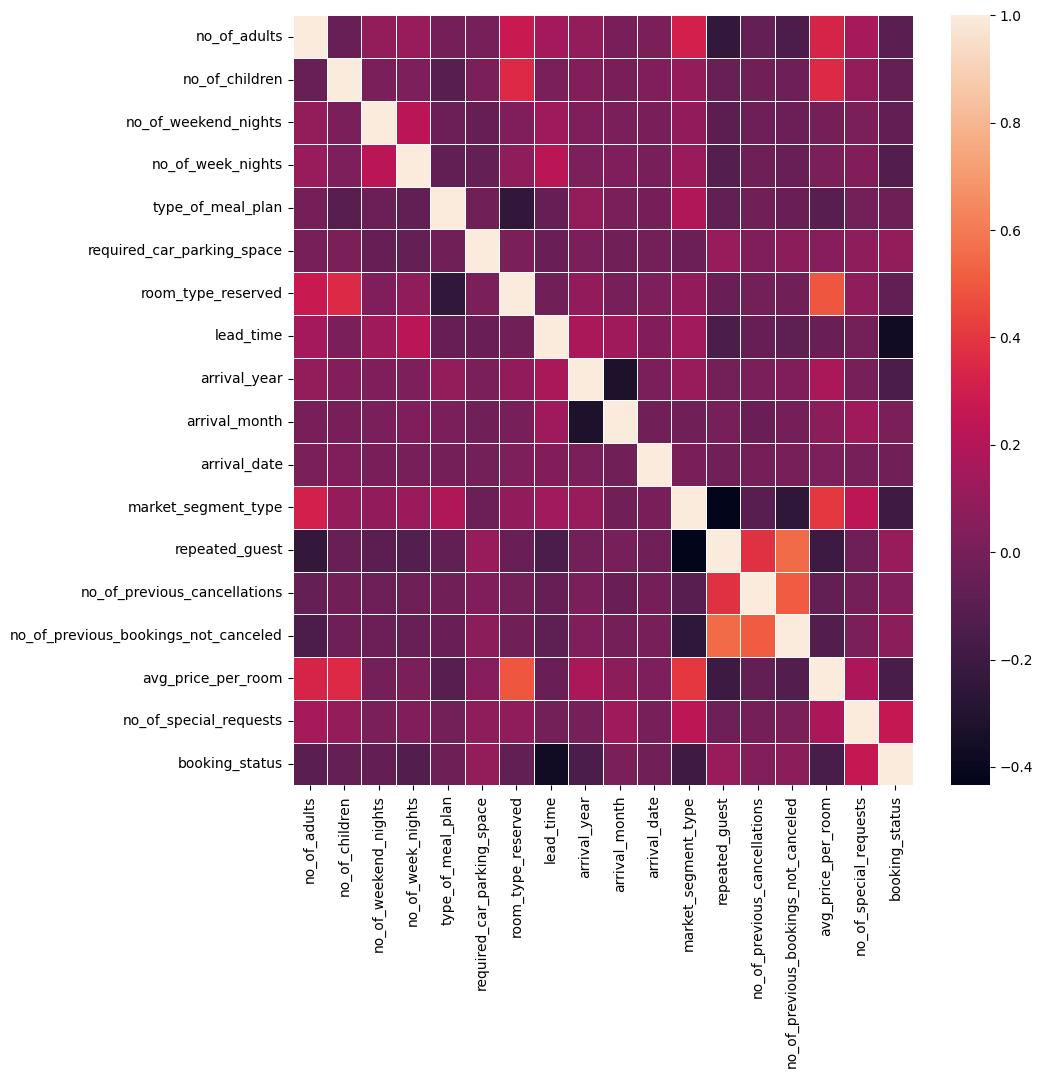

In [225]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,linewidths=0.5)

In [232]:
data = df.copy()

In [234]:
from sklearn.preprocessing import PowerTransformer


In [237]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
data[num_cols] = pt.fit_transform(data[num_cols])

In [273]:
skewness = data.skew()
skewness

lead_time                -0.266073
avg_price_per_room        0.267524
no_of_special_requests    0.325558
arrival_date             -0.228246
arrival_month            -0.197681
market_segment_type      -2.674780
no_of_week_nights         0.013946
no_of_weekend_nights     -0.008959
arrival_year             -2.267523
no_of_adults              0.079642
booking_status            0.000000
dtype: float64

In [274]:
data["booking_status"].value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [240]:
X = data.drop(columns='booking_status')
y = data['booking_status']

In [241]:
from imblearn.over_sampling import SMOTE
smote =SMOTE(random_state=42)
X_res , y_res =smote.fit_resample(X,y)

In [242]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [243]:
balanced_df = pd.DataFrame(X_res,columns=X.columns)
balanced_df['booking_status'] = y_res

In [244]:
from sklearn.ensemble import RandomForestClassifier

In [245]:
X = data.drop(columns='booking_status')
y = data['booking_status']

In [246]:
model = RandomForestClassifier(random_state= 42)
model.fit(X,y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [247]:
feature_importance = model.feature_importances_

In [248]:
feature_importance_df = pd.DataFrame({
    'feature':X.columns,
    'importance':feature_importance
})

In [249]:
top_feature_importance_df = feature_importance_df.sort_values(by='importance',ascending=False)

In [250]:
top_10_features = top_feature_importance_df["feature"].head(10).values
top_10_df = balanced_df[top_10_features.tolist()+['booking_status']]

In [251]:
top_10_df.value_counts('booking_status')
data = top_10_df.copy()

In [252]:
data

,lead_time,avg_price_per_room,no_of_special_requests,arrival_date,arrival_month,market_segment_type,no_of_week_nights,no_of_weekend_nights,arrival_year,no_of_adults,booking_status
0,-0.328383,1.438237,-1.029761,0.216726,0.851797,4,-0.852309,1.202954,-2.374311,0.179923,1
1,0.741526,0.442053,1.364107,0.109803,-0.138438,4,-0.852309,0.402818,0.421175,0.179923,1
2,2.476422,-0.930052,-1.029761,-0.825103,0.516978,3,0.640492,-1.088912,0.421175,0.179923,0
3,1.462837,-0.867731,-1.029761,-0.825103,0.186754,3,1.642256,1.202954,0.421175,0.179923,1
4,1.421189,0.659776,-1.029761,0.001106,-0.458057,3,-0.010802,-1.088912,0.421175,-1.620621,0
...,...,...,...,...,...,...,...,...,...,...,...
30457,1.910825,0.224030,-1.029761,0.723792,-0.241014,3,-0.010802,-1.088912,0.421175,0.179923,0
30458,0.885411,-0.867731,-1.029761,0.781878,0.109807,3,1.051689,0.402818,0.421175,0.179923,0
30459,-0.062092,0.078077,-1.029761,-0.287817,-0.592596,4,0.640492,1.202954,0.421175,0.179923,0
30460,0.013463,0.068298,0.633049,-1.380421,-1.077625,4,-0.852309,0.402818,0.421175,-0.069214,0


In [253]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [254]:
X = data.drop(columns='booking_status')
y = data['booking_status']

In [255]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [256]:
classifiers = {
    'Random Forest' : RandomForestClassifier(random_state=42),
    'Logistic Regression' : LogisticRegression(random_state=42),
    'Gradient Boosting' : GradientBoostingClassifier(random_state= 42),
    'Support Vector Classifier':SVC(random_state=42),
    'Decision Tree':DecisionTreeClassifier(random_state=42),
    'KNN' : KNeighborsClassifier(),
    'Naive Bayes' : GaussianNB(),
    'XGBOOST' : XGBClassifier(random_state=42),
    'Adaboost' : AdaBoostClassifier(random_state=42),
    'LGBM' : LGBMClassifier(random_state=42)
}

In [257]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [258]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1824
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [259]:
metrics_df = pd.DataFrame(metrics)

In [260]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.898572,0.897794,0.901303,0.899545
1,Logistic Regression,0.776137,0.786242,0.763192,0.774545
2,Gradient Boosting,0.850977,0.838659,0.871987,0.854998
3,Support Vector Classifier,0.805022,0.800831,0.815961,0.808325
4,Decision Tree,0.844247,0.847136,0.842997,0.845061
5,KNN,0.823896,0.883007,0.749837,0.810992
6,Naive Bayes,0.730346,0.820963,0.594463,0.689590
7,XGBOOST,0.900706,0.888924,0.917590,0.903029
8,Adaboost,0.792713,0.795165,0.792834,0.793998
9,LGBM,0.897259,0.884035,0.916287,0.899872


In [261]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [262]:
X = data.drop(columns='booking_status')
y = data['booking_status']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [263]:
rf = RandomForestClassifier(random_state=42)


In [264]:
params_dist={
    'n_estimators' : randint(100,500),
    'max_depth': randint(10,50),
    'min_samples_split':randint(2,10),
    'min_samples_leaf':randint(1,5),
    'bootstrap':[True,False]
}

In [267]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions = params_dist,
    n_iter=5,
    cv = 5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)



In [268]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.8s
[CV]

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....t 0x11520df50>, 'min_samples_leaf': <scipy.stats....t 0x11520b200>, 'min_samples_split': <scipy.stats....t 0x11520a210>, ...}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [269]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [270]:
best_rf_model = random_search.best_estimator_

In [271]:
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [272]:
print(accuracy,precision,recall,f1)

0.8987362547185295 0.8944998391765842 0.9058631921824104 0.9001456546366726


In [ ]:
import os
import joblib

In [ ]:
os.mkdir("../artifacts/models")

In [ ]:

joblib.dump(best_rf_model,"../artifacts/models/random_forest.pkl")

['../artifacts/models/random_forest.pkl']